In [1]:
include("../src/JuliaMBD.jl")

Main.JuliaMBD

In [2]:
using DifferentialEquations
using Plots
using .JuliaMBD
using .JuliaMBD.Diagram

In [4]:
@model RLC begin

    @parameter begin
        R
        L
        C
    end

    @xmlmodel "RLC.drawio"
end


RLC (generic function with 1 method)

In [5]:
## RLC test

@model Test begin
    @parameter begin
        R
        L
        C
        voltage
    end

    @block begin
        system = RLC(R=R, L=L, C=C)
        source = Step(steptime=0.1, finalvalue=voltage)
    end

    @connect begin
        source.out => system.in
    end

    @scope begin
        # source.out => v
        system.out => i
    end
end

Test (generic function with 1 method)

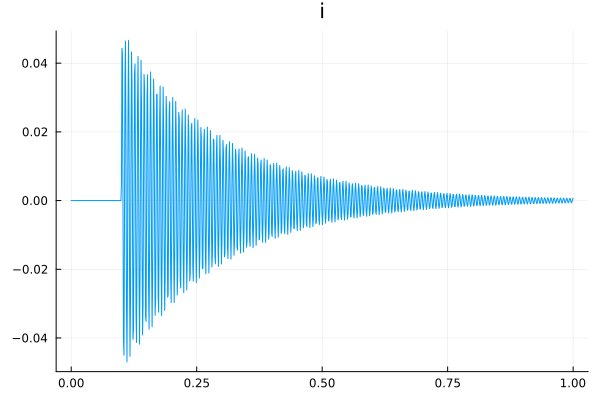

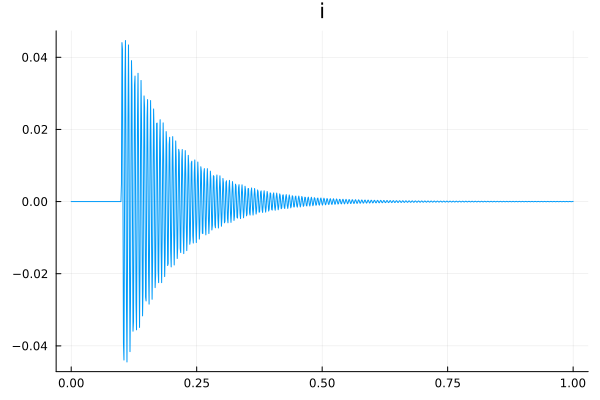

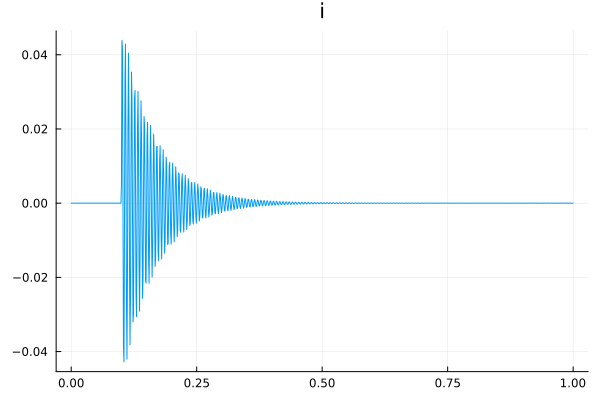

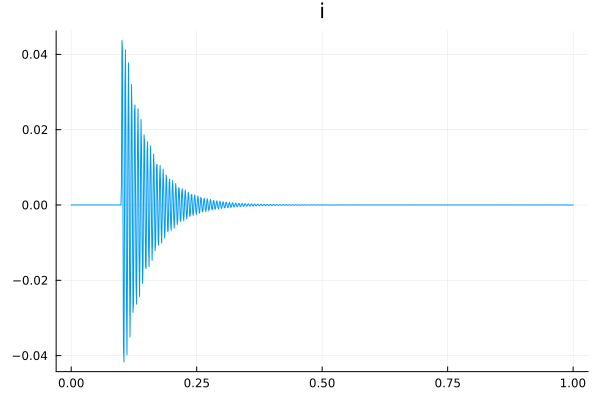

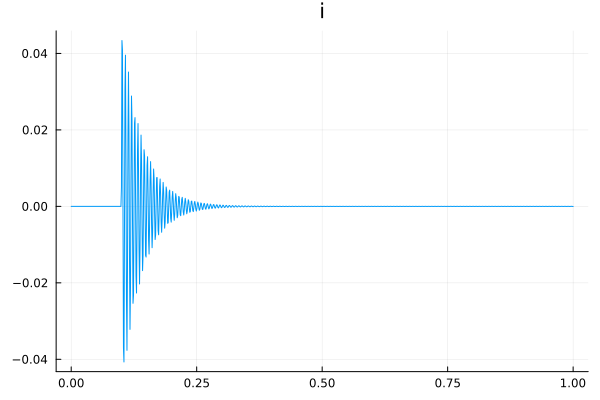

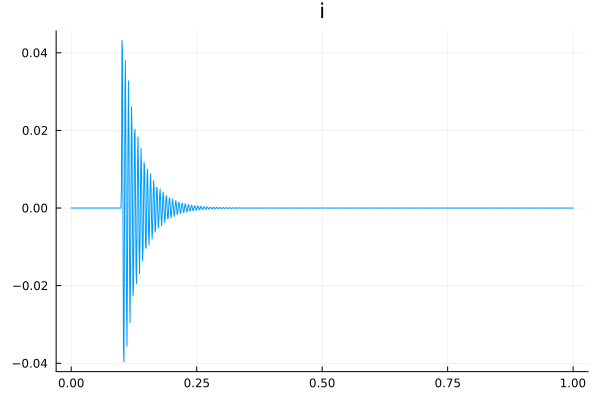

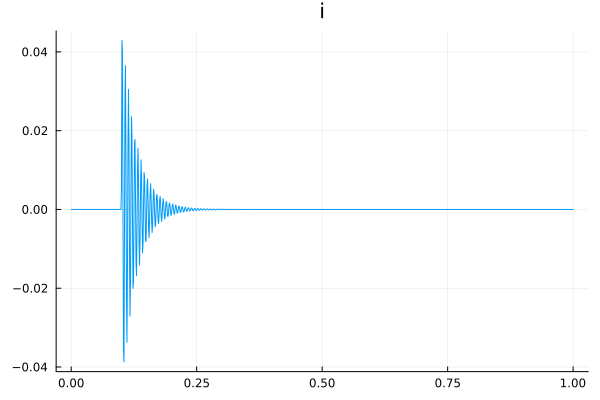

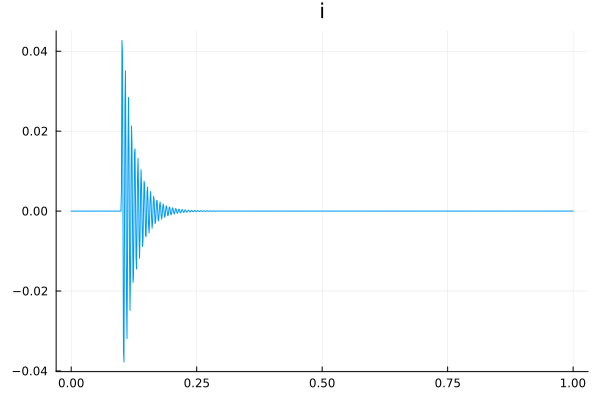

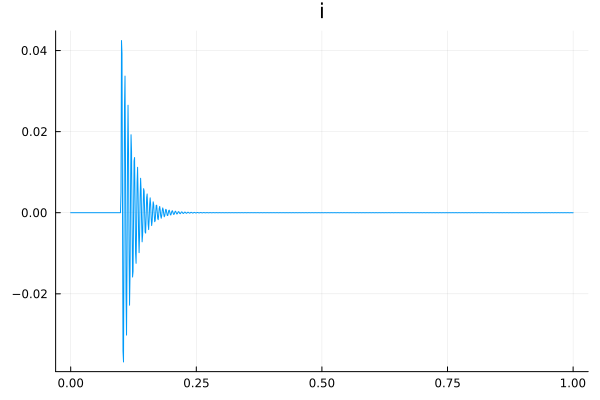

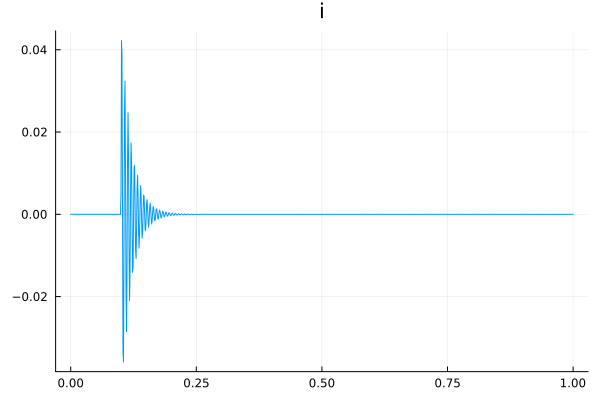

In [6]:
m = @compile Test(R=@v(R), L=100e-3, C=10e-6, voltage=5)
for R = 1:10
    result = JuliaMBD.simulate(m, tspan=(0,1), parameters=(R=R,), alg=DifferentialEquations.Tsit5());
    display(plot(result))
end
